In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [157]:
import pandas as pd
from sqlalchemy import create_engine, text

# Update the path to reflect the correct location of your database file
engine = create_engine('sqlite:///Maji_Ndogo_farm_survey_small.db')  # Added ./ to signify current directory

with engine.connect() as connection:
    result = connection.execute(text("SELECT name FROM sqlite_master WHERE type='table';"))
    for row in result:
        print(row)

('geographic_features',)
('weather_features',)
('soil_and_crop_features',)
('farm_management_features',)


In [158]:
slq_query = """
            SELECT *
            FROM farm_management_features
            JOIN geographic_features
            ON farm_management_features.field_id = geographic_features.field_id
            JOIN soil_and_crop_features
            ON geographic_features.field_id = soil_and_crop_features.field_id
            JOIN weather_features
            ON soil_and_crop_features.field_id = weather_features.field_id
            """


In [159]:
df=pd.read_sql(slq_query,engine)
df.head()

,Field_ID,Pollution_level,Plot_size,Crop_type,Annual_yield,Standard_yield,Field_ID,Elevation,Latitude,Longitude,...,Slope,Field_ID,Soil_fertility,Soil_type,pH,Field_ID,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps
0,40734,0.085267,1.3,0.751354,cassava,0.577964,40734,786.05580,-7.389911,-7.556202,...,14.795113,40734,0.62,Sandy,6.169393,40734,1125.2,-3.1,33.1,15.00
1,30629,0.399684,2.2,1.069865,cassava,0.486302,30629,674.33410,-7.736849,-1.051539,...,11.374611,30629,0.64,Volcanic,5.676648,30629,1450.7,-3.9,30.6,13.35
2,39924,0.358029,3.4,2.208801,tea,0.649647,39924,826.53390,-9.926616,0.115156,...,11.339692,39924,0.69,Volcanic,5.331993,39924,2208.9,-1.8,28.4,13.30
3,5754,0.286687,2.4,1.277635,cassava,0.532348,5754,574.94617,-2.420131,-6.592215,...,7.109855,5754,0.54,Loamy,5.328150,5754,328.8,-5.8,32.2,13.20
4,14146,0.043190,1.5,0.832614,wheat,0.555076,14146,886.35300,-3.055434,-7.952609,...,55.007656,14146,0.72,Sandy,5.721234,14146,785.2,-2.5,31.0,14.25


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5654 entries, 0 to 5653
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Field_ID           5654 non-null   int64  
 1   Pollution_level    5654 non-null   float64
 2   Plot_size          5654 non-null   float64
 3   Crop_type          5654 non-null   float64
 4   Annual_yield       5654 non-null   object 
 5   Standard_yield     5654 non-null   float64
 6   Field_ID           5654 non-null   int64  
 7   Elevation          5654 non-null   float64
 8   Latitude           5654 non-null   float64
 9   Longitude          5654 non-null   float64
 10  Location           5654 non-null   object 
 11  Slope              5654 non-null   float64
 12  Field_ID           5654 non-null   int64  
 13  Soil_fertility     5654 non-null   float64
 14  Soil_type          5654 non-null   object 
 15  pH                 5654 non-null   float64
 16  Field_ID           5654 

In [161]:
df.shape

(5654, 21)

In [162]:
df.duplicated().sum()

np.int64(0)

In [163]:
df.rename({"Crop_type":"Annual yield"},axis=1,inplace=True)

In [164]:
df.rename({"Annual_yield":"Crop_type"},axis=1,inplace=True)

In [165]:
df.rename({"Annual yield":"Annual_yield"},axis=1,inplace=True)

In [166]:
df["Crop_type"].unique()

array(['cassava', 'tea', 'wheat', 'potato', 'banana', 'coffee', 'rice',
       'maize', 'wheat ', 'tea ', 'cassaval', 'wheatn', 'cassava ',
       'teaa'], dtype=object)

In [167]:
df["Crop_type"]=df["Crop_type"].str.replace(" ","")

In [168]:
df["Crop_type"]=df["Crop_type"].replace({'caassaval':"cassava", 'teaa':'tea','wheatn':'wheat','cassaval':'cassava'})

In [169]:
df["Crop_type"].nunique()

8

In [170]:
df.shape

(5654, 21)

In [171]:
df = df.drop(columns=["Field_ID"])


In [172]:
df["Elevation"]=df["Elevation"].abs()

In [173]:
df["Elevation"].min()

np.float64(35.910797)

In [174]:
df["Annual_yield"].dtype

dtype('float64')

In [175]:
df.isnull().sum()

Pollution_level      0
Plot_size            0
Annual_yield         0
Crop_type            0
Standard_yield       0
Elevation            0
Latitude             0
Longitude            0
Location             0
Slope                0
Soil_fertility       0
Soil_type            0
pH                   0
Rainfall             0
Min_temperature_C    0
Max_temperature_C    0
Ave_temps            0
dtype: int64

In [176]:
df.describe()

,Pollution_level,Plot_size,Annual_yield,Standard_yield,Elevation,Latitude,Longitude,Slope,Soil_fertility,pH,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps
count,5.654000e+03,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000
mean,2.231923e-01,3.923965,2.090399,0.534405,637.790709,-7.026330,-4.365755,11.742669,0.619308,5.607073,1201.943244,-4.411956,30.857057,13.222550
std,2.237976e-01,3.463855,1.935000,0.111806,173.573934,3.515839,2.706603,9.540599,0.044791,0.789215,499.782824,1.534330,1.884682,0.801636
min,1.013245e-10,0.500000,0.172226,0.170717,35.910797,-15.009038,-10.015722,0.097316,0.510000,3.700337,103.100000,-9.700000,24.500000,10.250000
25%,5.133734e-02,1.500000,0.767032,0.460386,525.611413,-9.674298,-6.708209,4.860120,0.590000,5.030630,773.175000,-5.500000,29.600000,12.700000
50%,1.647056e-01,2.800000,1.446648,0.528836,663.058585,-7.205178,-4.463785,9.104626,0.620000,5.602896,1200.600000,-4.300000,30.800000,13.200000
75%,3.058885e-01,4.700000,2.530662,0.599942,764.299550,-4.182984,-2.015527,15.953242,0.650000,6.162058,1625.425000,-3.300000,32.100000,13.750000
max,9.954134e-01,15.000000,12.695224,0.898037,1122.252100,0.260756,1.696276,79.865960,0.820000,7.499959,2470.900000,-0.100000,37.800000,17.300000


In [177]:
df.columns = df.columns.str.strip(" ").str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
df.columns


Index(['Pollution_level', 'Plot_size', 'Annual_yield', 'Crop_type',
       'Standard_yield', 'Elevation', 'Latitude', 'Longitude', 'Location',
       'Slope', 'Soil_fertility', 'Soil_type', 'pH', 'Rainfall',
       'Min_temperature_C', 'Max_temperature_C', 'Ave_temps'],
      dtype='object')

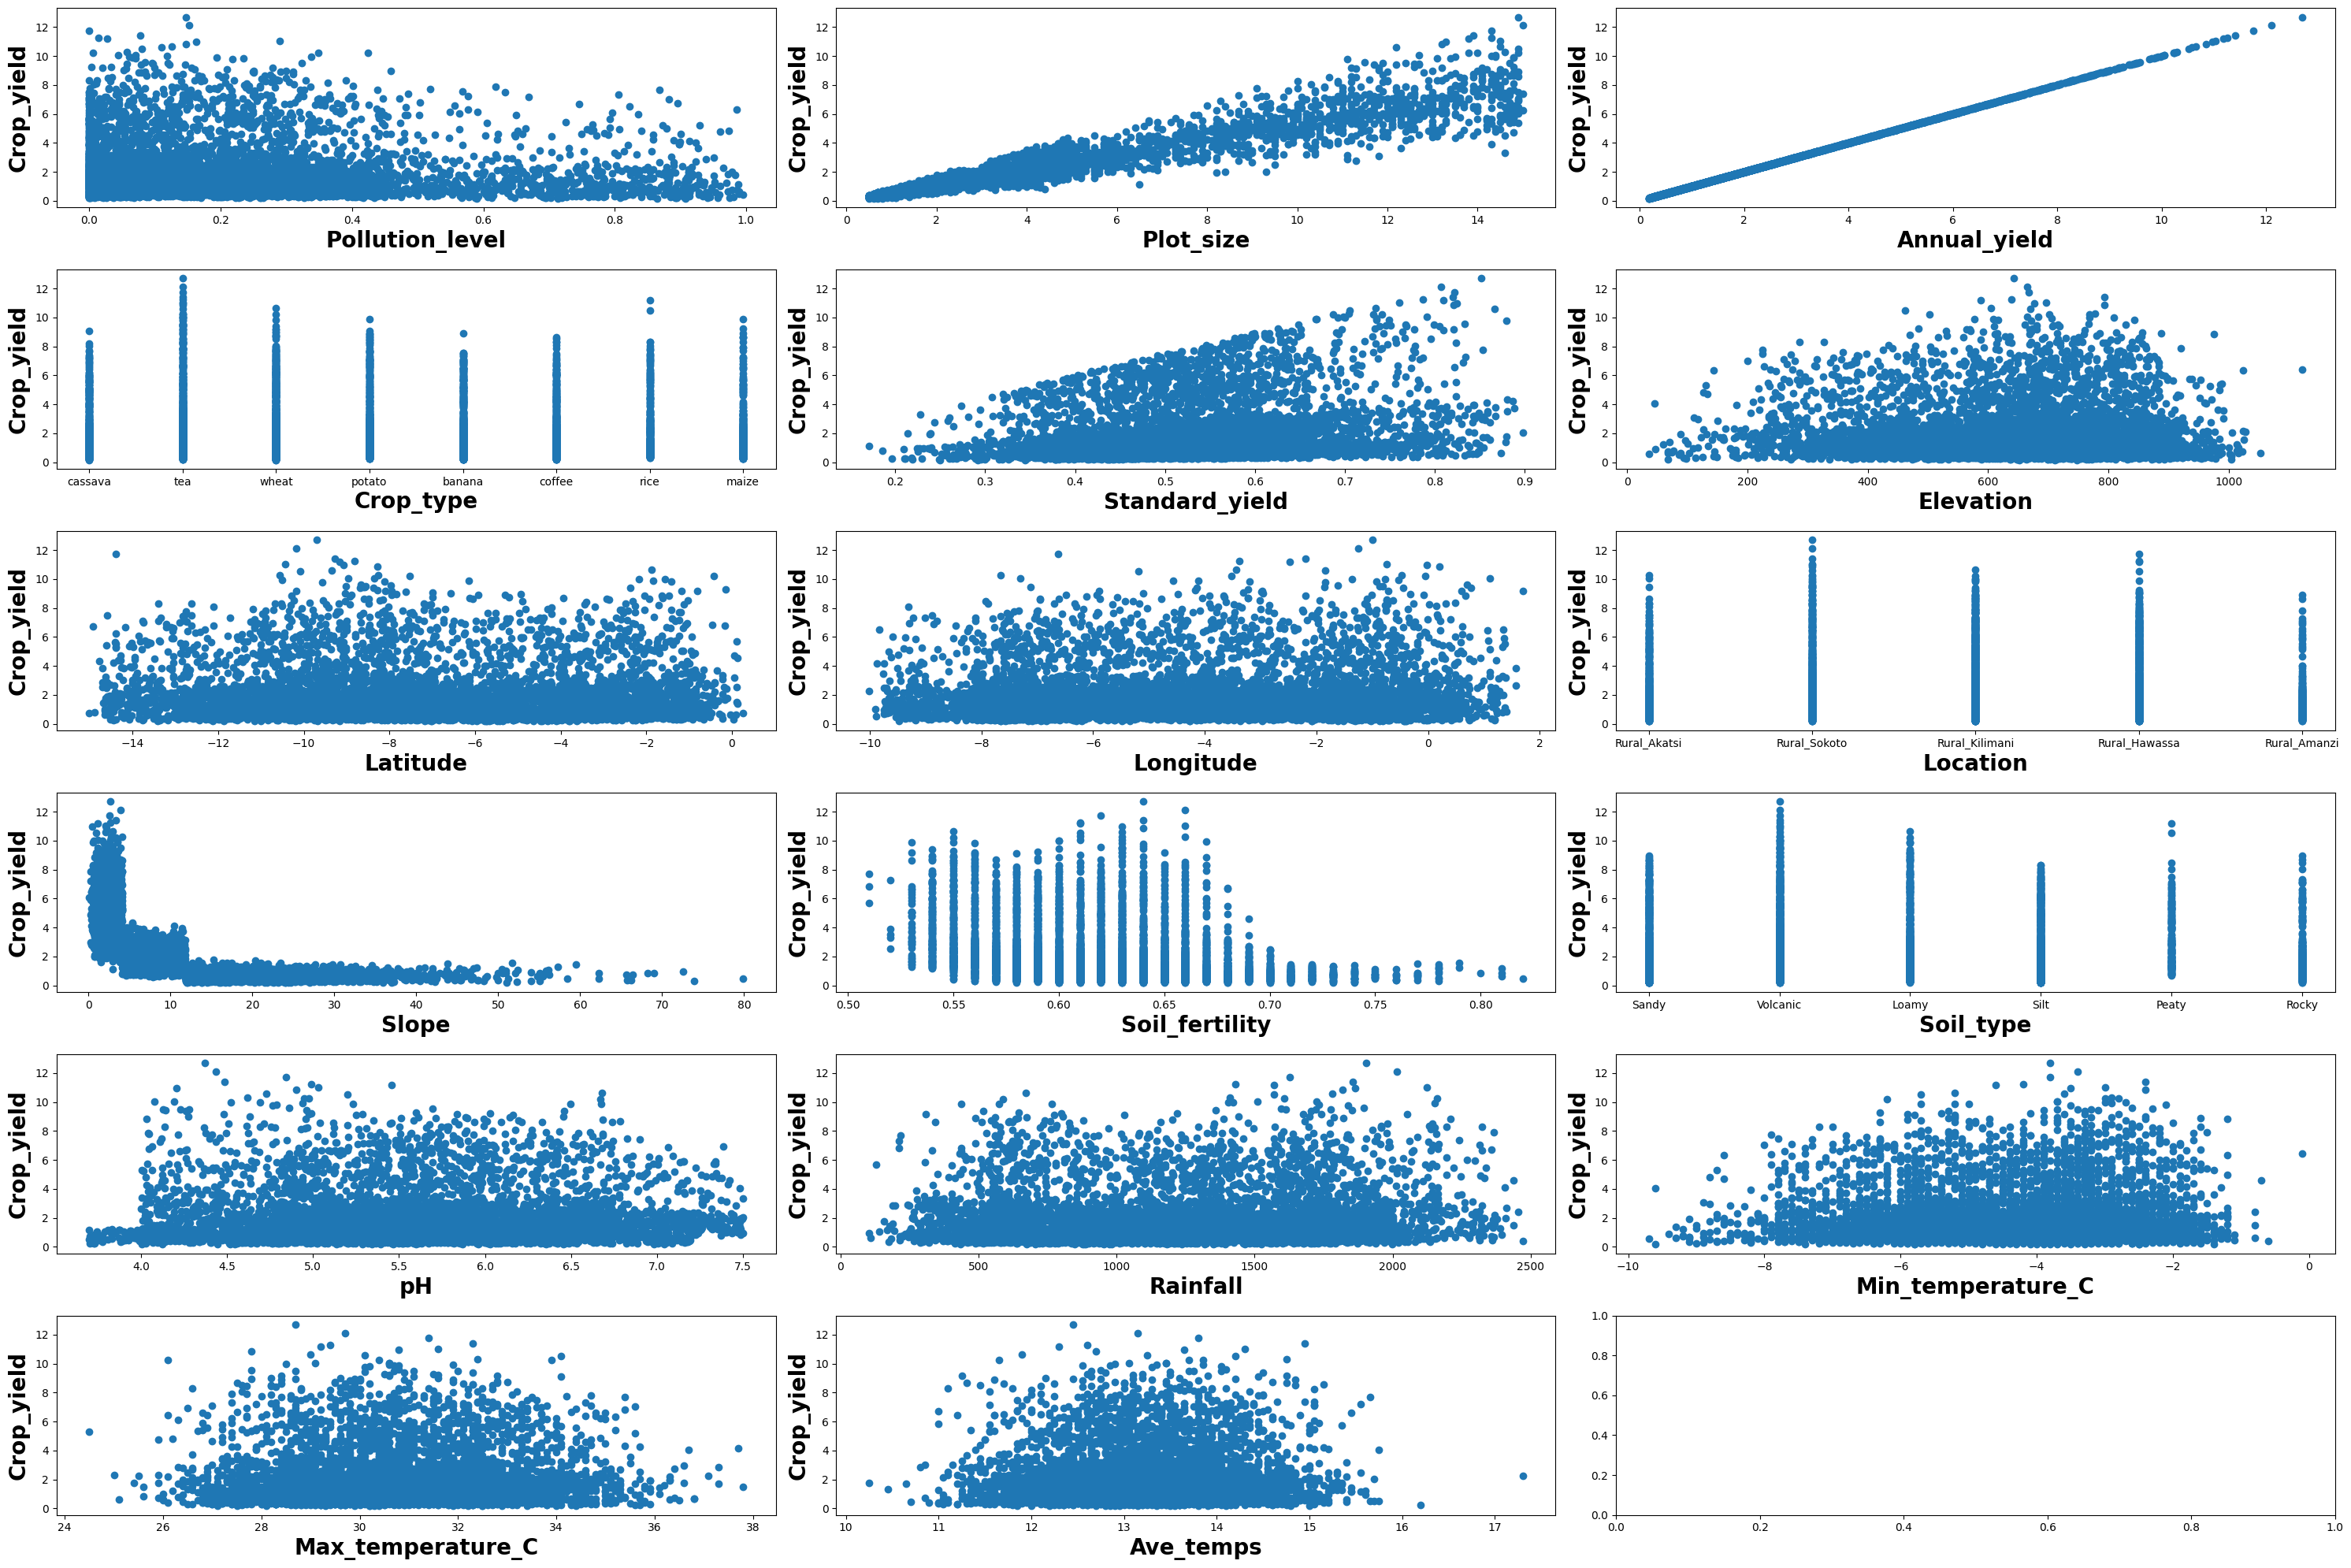

In [178]:
num_cols = len(df.columns)
num_subplots = min(6, num_cols)
rows = np.ceil(num_cols / 3).astype(int)

fig, ax = plt.subplots(ncols=3, nrows=rows, figsize=(30, 20), facecolor="white")
ax = ax.flatten()

for i in range(num_cols):
    ax[i].scatter(x=df[df.columns[i]], y=df["Annual_yield"])
    ax[i].set_xlabel(df.columns[i], fontsize=20, fontdict={"weight": "bold"})
    ax[i].set_ylabel("Crop_yield", fontsize=20, fontdict={"weight": "bold"})

plt.tight_layout()
plt.show()


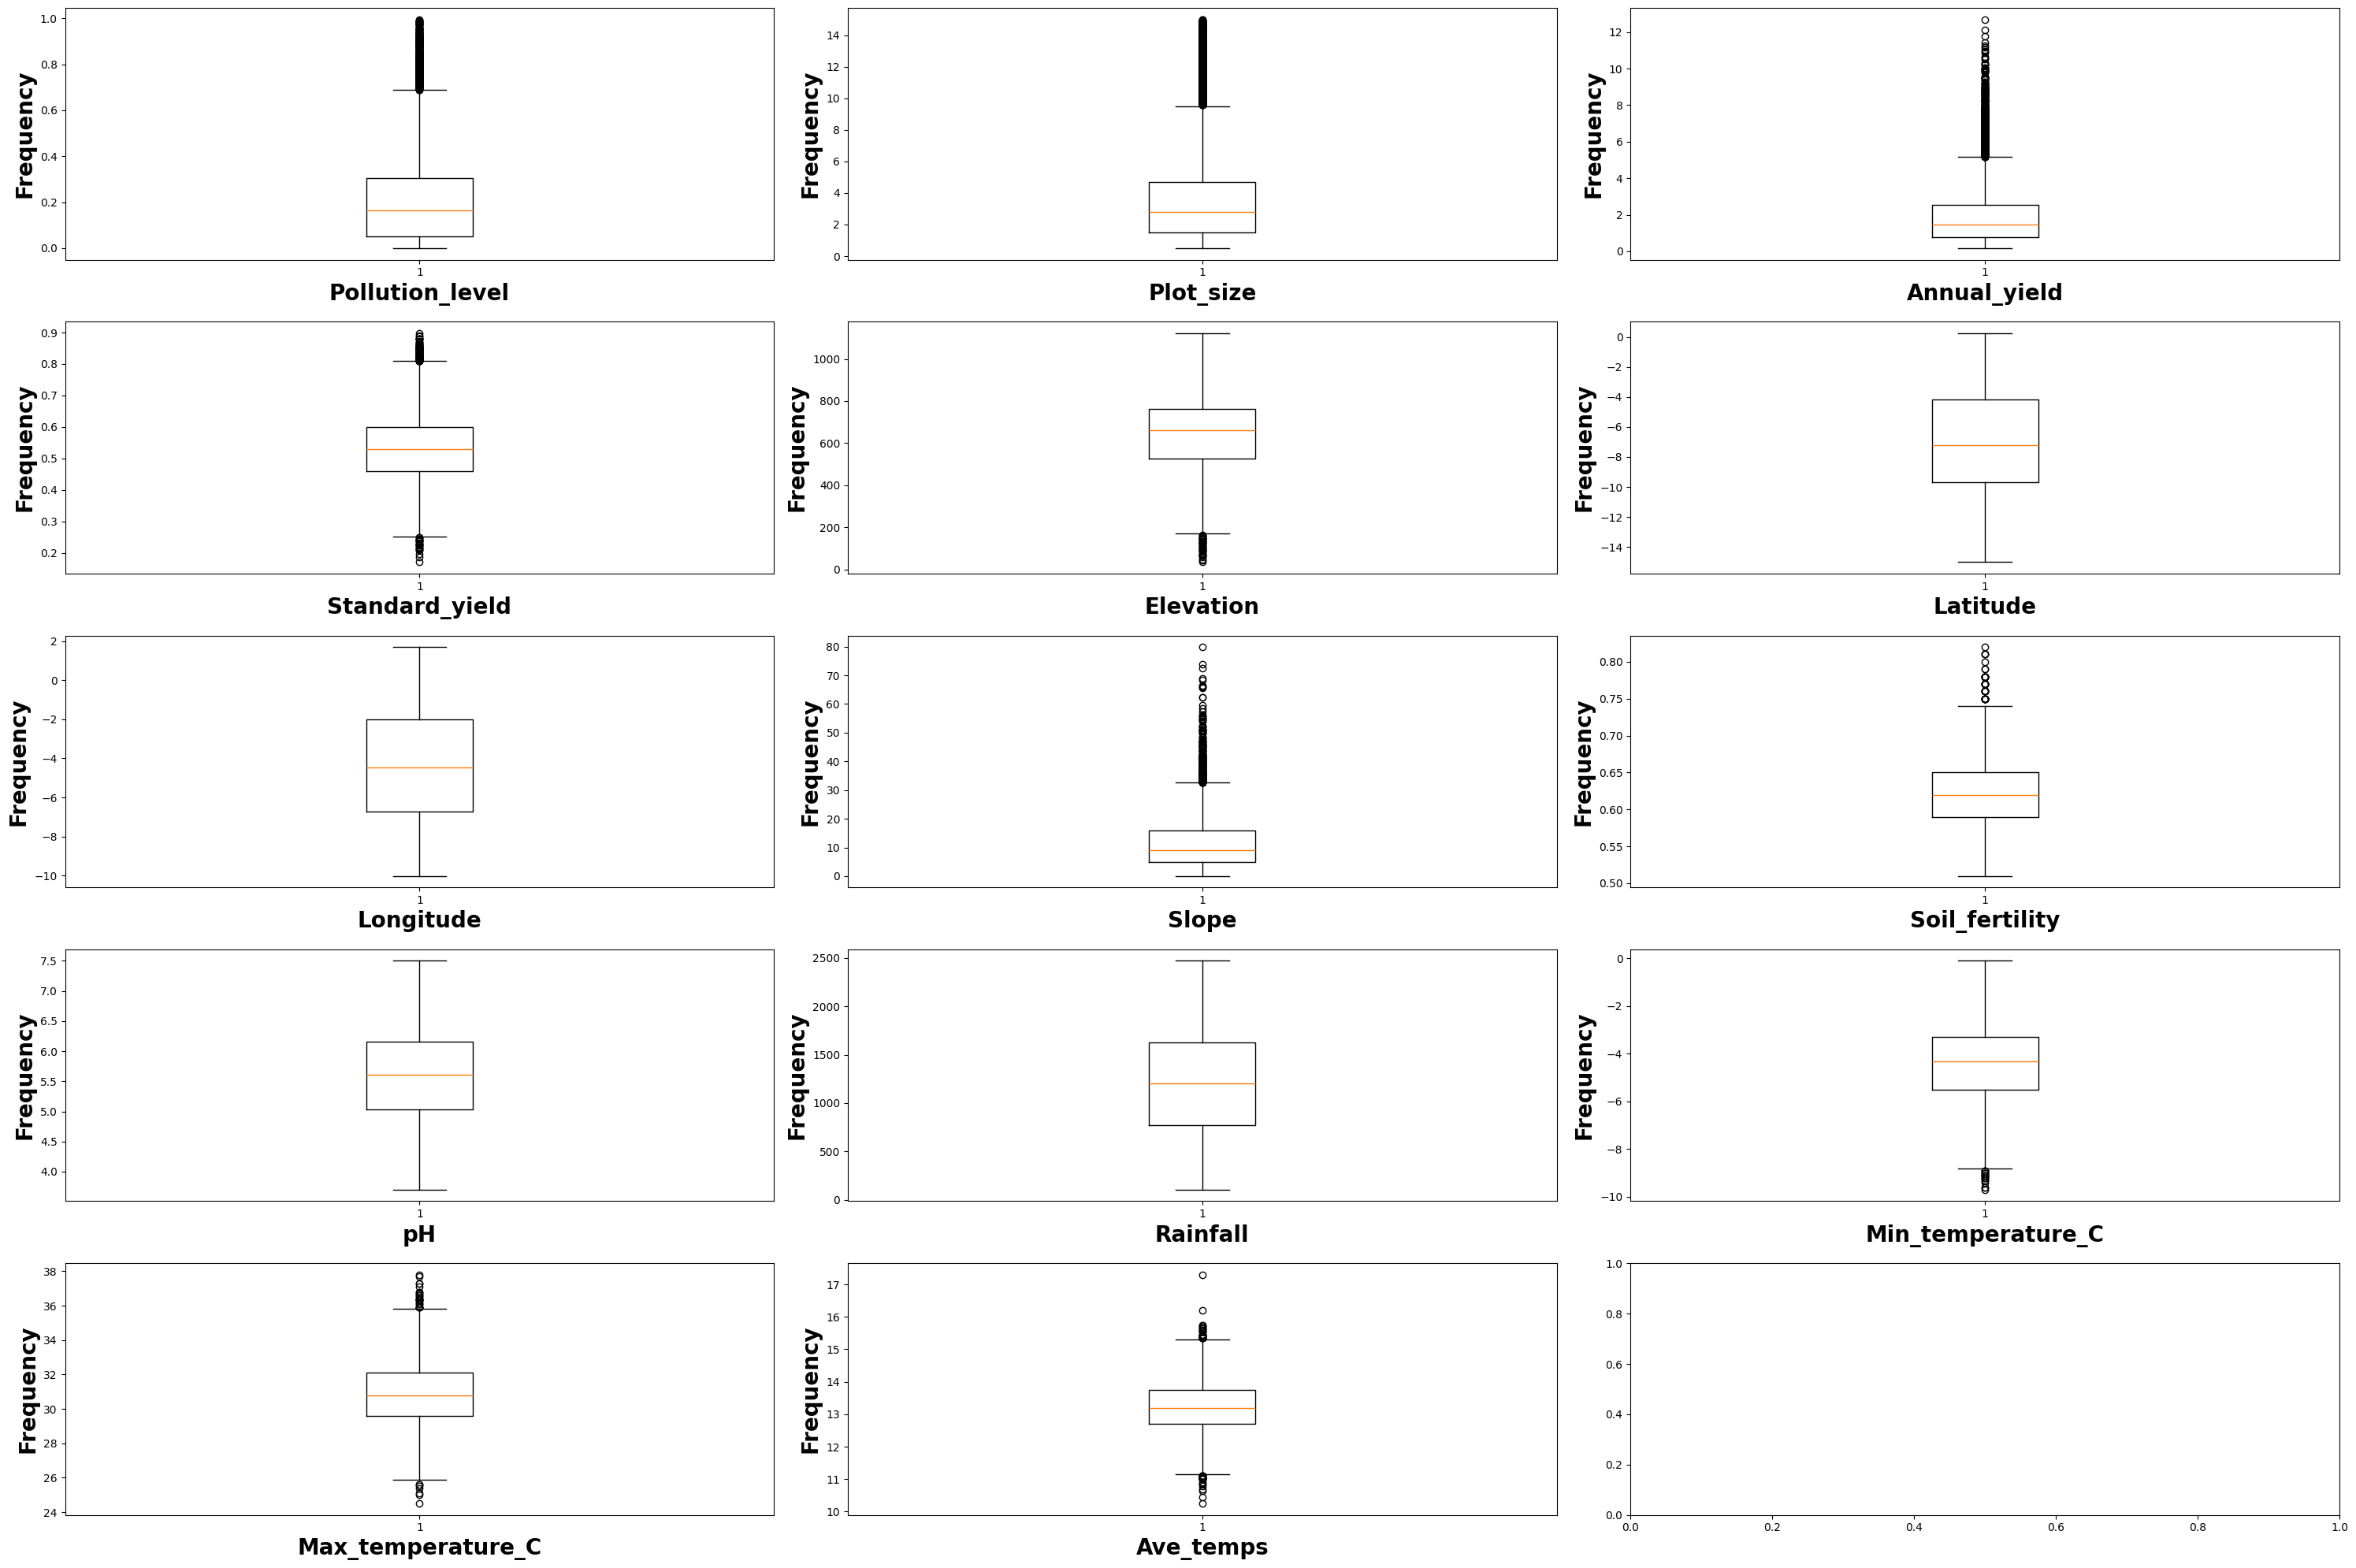

In [179]:
numeric_columns = df.select_dtypes(include=np.number).columns
num_cols = len(numeric_columns)
rows = int(np.ceil(num_cols / 3)) # Calculate the number of rows required

fig, ax = plt.subplots(ncols=3, nrows=rows, figsize=(30, 20), facecolor="white")
ax = ax.flatten()
for i in range(num_cols):
    ax[i].boxplot(df[numeric_columns[i]])
    ax[i].set_xlabel(numeric_columns[i], fontsize=20, fontdict={"weight": "bold"})
    ax[i].set_ylabel("Frequency", fontsize=20, fontdict={"weight": "bold"})

plt.tight_layout()
plt.show()

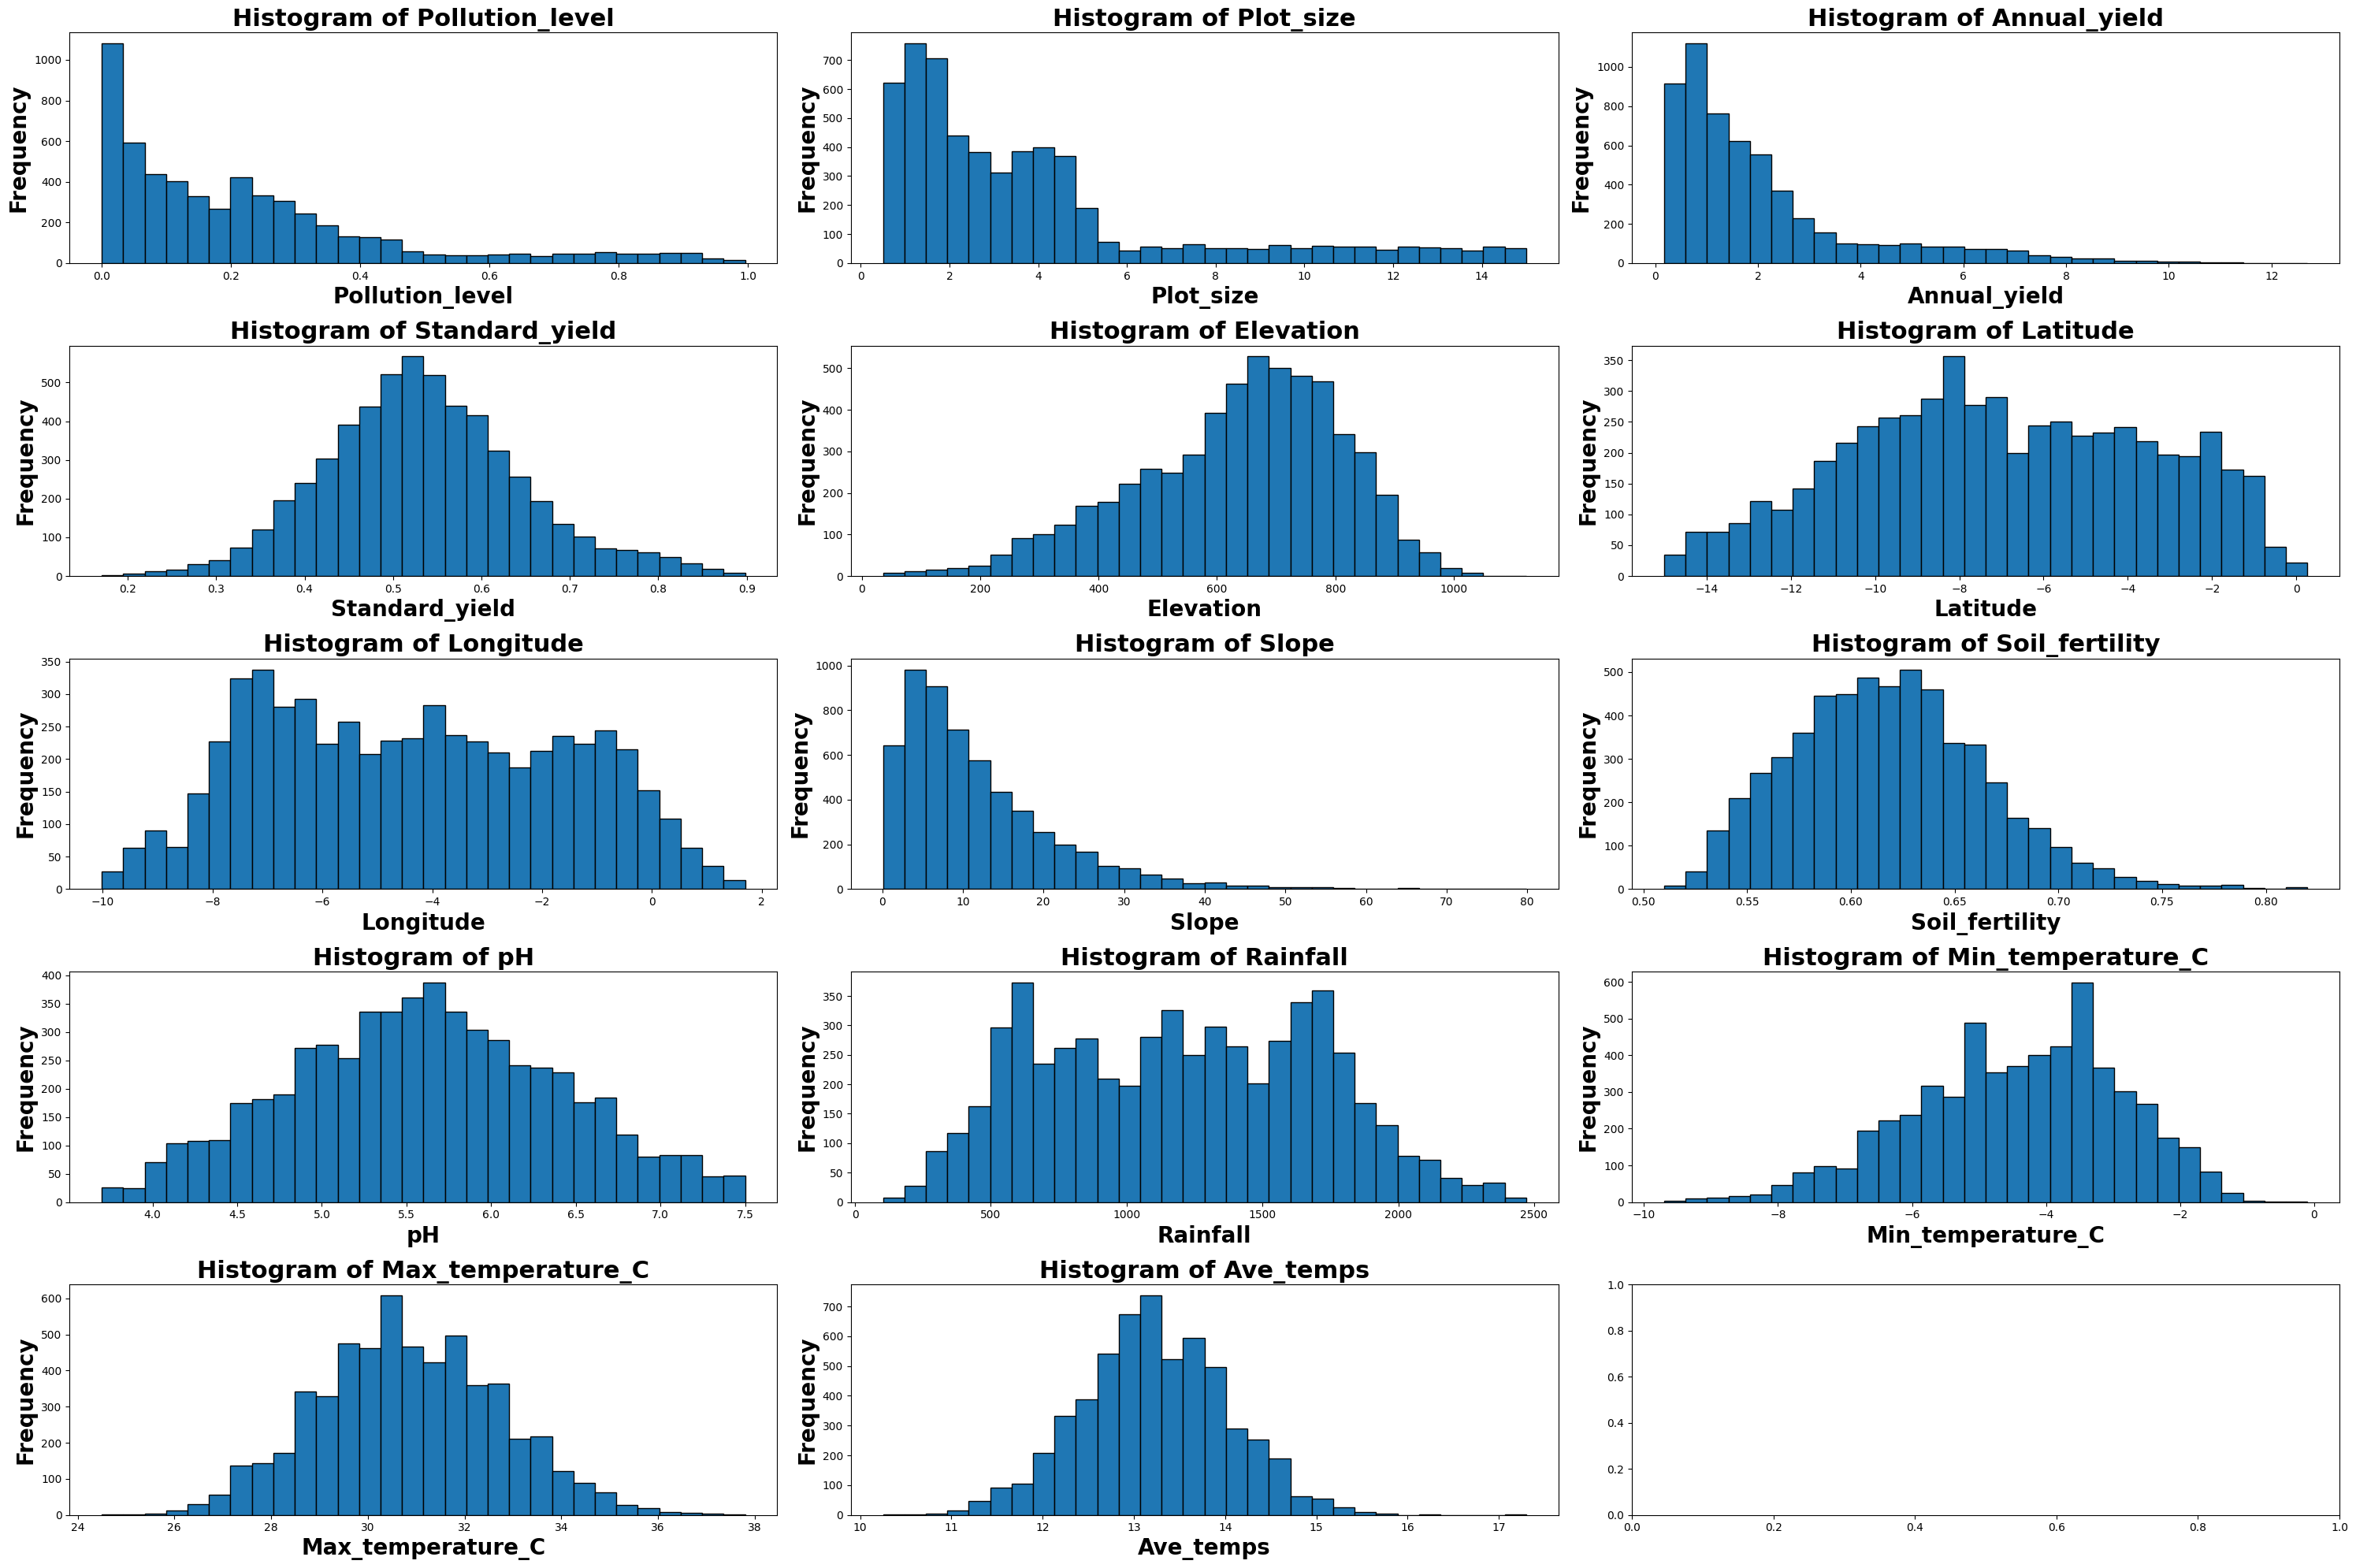

In [180]:
numeric_columns = df.select_dtypes(include=np.number).columns
num_cols = len(numeric_columns)
rows = np.ceil(num_cols / 3).astype(int)

fig, ax = plt.subplots(ncols=3, nrows=rows, figsize=(30, 20), facecolor="white")
ax = ax.flatten()


for i in range(num_cols):
    ax[i].hist(df[numeric_columns[i]], bins=30, edgecolor='black')
    ax[i].set_xlabel(numeric_columns[i], fontsize=20, fontdict={"weight": "bold"})
    ax[i].set_ylabel("Frequency", fontsize=20, fontdict={"weight": "bold"})
    ax[i].set_title(f"Histogram of {numeric_columns[i]}", fontsize=22, fontdict={"weight": "bold"})

plt.tight_layout()
plt.show()


In [181]:
df.columns

Index(['Pollution_level', 'Plot_size', 'Annual_yield', 'Crop_type',
       'Standard_yield', 'Elevation', 'Latitude', 'Longitude', 'Location',
       'Slope', 'Soil_fertility', 'Soil_type', 'pH', 'Rainfall',
       'Min_temperature_C', 'Max_temperature_C', 'Ave_temps'],
      dtype='object')

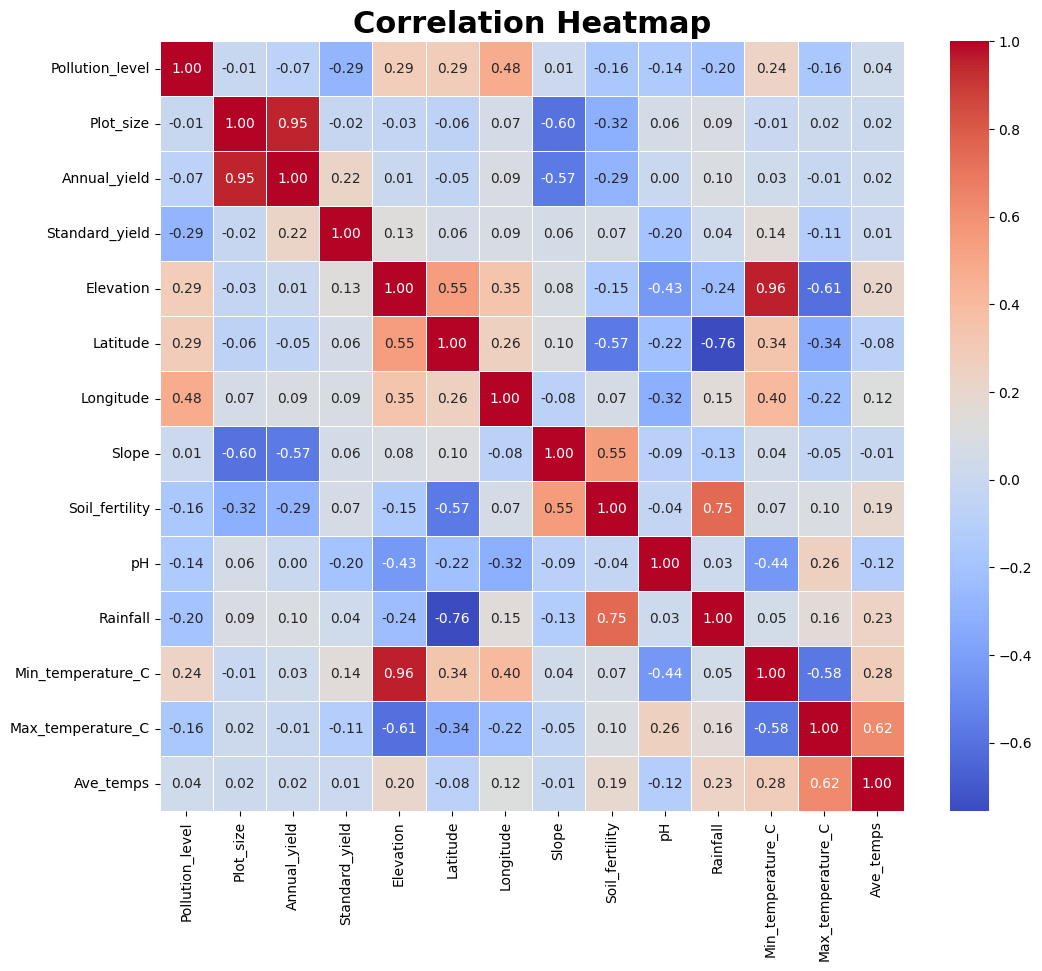

In [182]:
numeric_df = df.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=22, fontdict={"weight": "bold"})
plt.show()


In [183]:
df.to_csv("Actual_df.csv", index=False)

In [184]:
df['growing_conditions'] = (df['Rainfall'] +  df['Soil_fertility'])


In [185]:
df["yield_efficiency"] = (df["Annual_yield"] / df["Standard_yield"])

In [186]:
df["Soil_nature"]=(df["Soil_fertility"] * df["pH"])

In [187]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
correlation_matrix

,Pollution_level,Plot_size,Annual_yield,Standard_yield,Elevation,Latitude,Longitude,Slope,Soil_fertility,pH,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,growing_conditions,yield_efficiency,Soil_nature
Pollution_level,1.000000,-0.013718,-0.072318,-0.285761,0.285086,0.289556,0.476562,0.010879,-0.160151,-0.140758,-0.198268,0.235310,-0.161467,0.035383,-0.198269,-0.013718,-0.206488
Plot_size,-0.013718,1.000000,0.949441,-0.017014,-0.032261,-0.064183,0.065011,-0.603773,-0.320810,0.055303,0.092198,-0.005503,0.018017,0.015914,0.092163,1.000000,-0.096690
Annual_yield,-0.072318,0.949441,1.000000,0.220812,0.005033,-0.045701,0.088318,-0.571007,-0.294160,0.003464,0.098114,0.034617,-0.011637,0.019449,0.098081,0.949441,-0.134097
Standard_yield,-0.285761,-0.017014,0.220812,1.000000,0.129248,0.061724,0.085343,0.056991,0.070205,-0.196613,0.039217,0.144233,-0.111649,0.006786,0.039220,-0.017014,-0.161186
Elevation,0.285086,-0.032261,0.005033,0.129248,1.000000,0.546737,0.345139,0.081837,-0.146844,-0.430787,-0.238518,0.956418,-0.605884,0.203061,-0.238515,-0.032261,-0.466426
Latitude,0.289556,-0.064183,-0.045701,0.061724,0.546737,1.000000,0.257728,0.103381,-0.566838,-0.220201,-0.756442,0.337544,-0.340948,-0.077763,-0.756441,-0.064183,-0.461277
Longitude,0.476562,0.065011,0.088318,0.085343,0.345139,0.257728,1.000000,-0.078865,0.071705,-0.315035,0.146665,0.398923,-0.223253,0.119329,0.146661,0.065011,-0.266536
Slope,0.010879,-0.603773,-0.571007,0.056991,0.081837,0.103381,-0.078865,1.000000,0.550326,-0.087969,-0.131472,0.044370,-0.046567,-0.012279,-0.131413,-0.603773,0.169173
Soil_fertility,-0.160151,-0.320810,-0.294160,0.070205,-0.146844,-0.566838,0.071705,0.550326,1.000000,-0.035415,0.752914,0.072797,0.099502,0.186633,0.752953,-0.320810,0.421981
pH,-0.140758,0.055303,0.003464,-0.196613,-0.430787,-0.220201,-0.315035,-0.087969,-0.035415,1.000000,0.025182,-0.435366,0.255306,-0.116527,0.025178,0.055303,0.889019


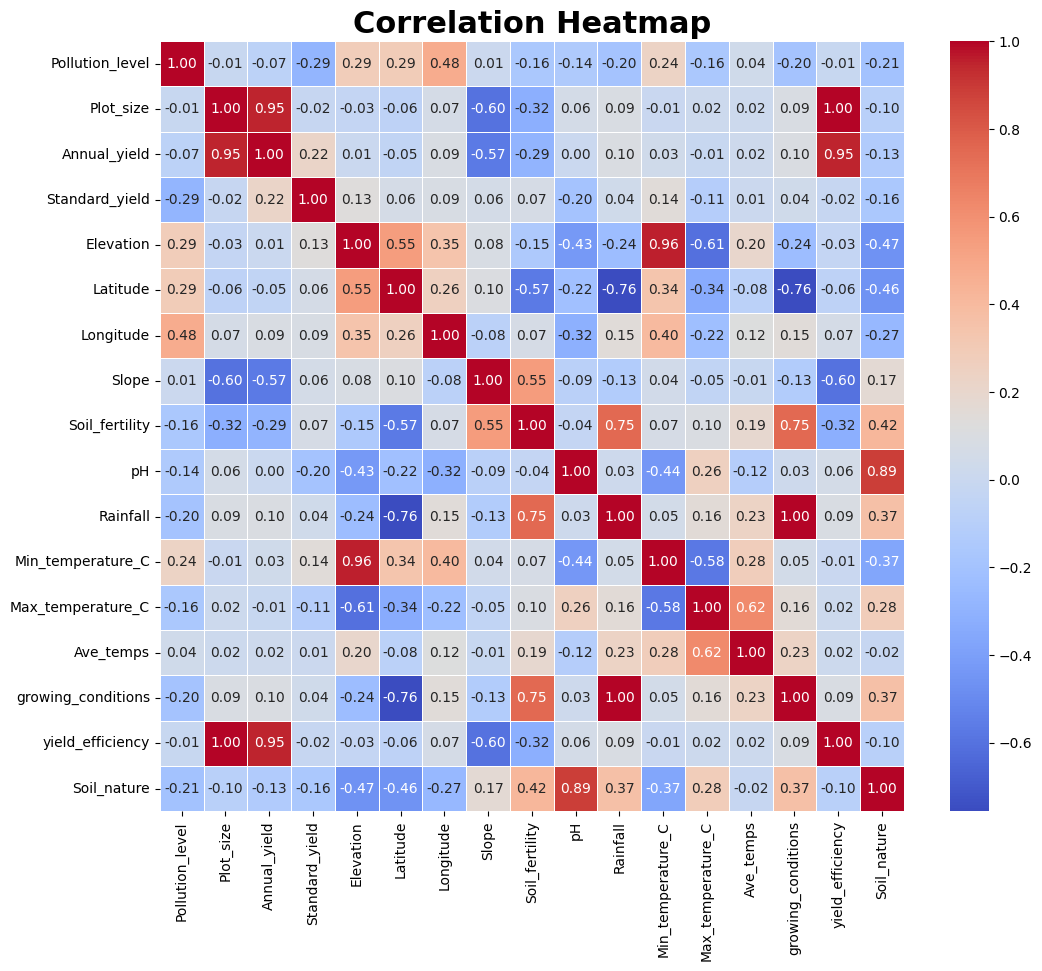

In [188]:
numeric_df = df.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=22, fontdict={"weight": "bold"})
plt.show()


In [189]:
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_cleaned
columns_to_check = ['Plot_size', 'Annual_yield', 'Pollution_level', 'Standard_yield', 'Elevation','Ave_temps', 'Slope']
df_cleaned = remove_outliers(df, columns_to_check)
print(df_cleaned)


      Pollution_level  Plot_size  Annual_yield Crop_type  Standard_yield  \
0        8.526684e-02        1.3      0.751354   cassava        0.577964   
1        3.996838e-01        2.2      1.069865   cassava        0.486302   
2        3.580286e-01        3.4      2.208801       tea        0.649647   
3        2.866871e-01        2.4      1.277635   cassava        0.532348   
6        4.315457e-07        2.9      0.994325    banana        0.342871   
...               ...        ...           ...       ...             ...   
5647     2.252567e-01        1.3      0.763248    banana        0.587114   
5649     3.286828e-01        1.1      0.609930    potato        0.554482   
5650     1.602583e-01        8.7      3.812289     maize        0.438194   
5651     8.221326e-09        2.1      1.681629       tea        0.800776   
5652     6.917245e-10        1.3      0.659874   cassava        0.507595   

      Elevation   Latitude  Longitude        Location      Slope  \
0     786.05580  -7

In [190]:
df.head()

,Pollution_level,Plot_size,Annual_yield,Crop_type,Standard_yield,Elevation,Latitude,Longitude,Location,Slope,Soil_fertility,Soil_type,pH,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,growing_conditions,yield_efficiency,Soil_nature
0,0.085267,1.3,0.751354,cassava,0.577964,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,0.62,Sandy,6.169393,1125.2,-3.1,33.1,15.00,1125.82,1.3,3.825024
1,0.399684,2.2,1.069865,cassava,0.486302,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,0.64,Volcanic,5.676648,1450.7,-3.9,30.6,13.35,1451.34,2.2,3.633054
2,0.358029,3.4,2.208801,tea,0.649647,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,0.69,Volcanic,5.331993,2208.9,-1.8,28.4,13.30,2209.59,3.4,3.679075
3,0.286687,2.4,1.277635,cassava,0.532348,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,0.54,Loamy,5.328150,328.8,-5.8,32.2,13.20,329.34,2.4,2.877201
4,0.043190,1.5,0.832614,wheat,0.555076,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,0.72,Sandy,5.721234,785.2,-2.5,31.0,14.25,785.92,1.5,4.119288


In [191]:
encoder = OneHotEncoder()


encoded_value = encoder.fit_transform(df[['Soil_type','Crop_type','Location']]).toarray()


encoded_value

with open("encoded_soil_type_crop_type_location.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [192]:
df["Soil_type"].nunique()

6

In [193]:
df["Crop_type"].nunique()

8

In [194]:
df["Location"].nunique()

5

In [195]:
df_encoded = pd.DataFrame(encoded_value, columns=encoder.get_feature_names_out(['Soil_type','Crop_type','Location'])) 
df_encoded.head()

,Soil_type_Loamy,Soil_type_Peaty,Soil_type_Rocky,Soil_type_Sandy,Soil_type_Silt,Soil_type_Volcanic,Crop_type_banana,Crop_type_cassava,Crop_type_coffee,Crop_type_maize,Crop_type_potato,Crop_type_rice,Crop_type_tea,Crop_type_wheat,Location_Rural_Akatsi,Location_Rural_Amanzi,Location_Rural_Hawassa,Location_Rural_Kilimani,Location_Rural_Sokoto
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [196]:
df = pd.concat([df, df_encoded], axis=1)
df.head()

,Pollution_level,Plot_size,Annual_yield,Crop_type,Standard_yield,Elevation,Latitude,Longitude,Location,Slope,...,Crop_type_maize,Crop_type_potato,Crop_type_rice,Crop_type_tea,Crop_type_wheat,Location_Rural_Akatsi,Location_Rural_Amanzi,Location_Rural_Hawassa,Location_Rural_Kilimani,Location_Rural_Sokoto
0,0.085267,1.3,0.751354,cassava,0.577964,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.399684,2.2,1.069865,cassava,0.486302,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.358029,3.4,2.208801,tea,0.649647,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.286687,2.4,1.277635,cassava,0.532348,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.043190,1.5,0.832614,wheat,0.555076,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [197]:
df.drop(columns=['Soil_type','Crop_type','Location'], inplace=True)
df.head()

,Pollution_level,Plot_size,Annual_yield,Standard_yield,Elevation,Latitude,Longitude,Slope,Soil_fertility,pH,...,Crop_type_maize,Crop_type_potato,Crop_type_rice,Crop_type_tea,Crop_type_wheat,Location_Rural_Akatsi,Location_Rural_Amanzi,Location_Rural_Hawassa,Location_Rural_Kilimani,Location_Rural_Sokoto
0,0.085267,1.3,0.751354,0.577964,786.05580,-7.389911,-7.556202,14.795113,0.62,6.169393,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.399684,2.2,1.069865,0.486302,674.33410,-7.736849,-1.051539,11.374611,0.64,5.676648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.358029,3.4,2.208801,0.649647,826.53390,-9.926616,0.115156,11.339692,0.69,5.331993,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.286687,2.4,1.277635,0.532348,574.94617,-2.420131,-6.592215,7.109855,0.54,5.328150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.043190,1.5,0.832614,0.555076,886.35300,-3.055434,-7.952609,55.007656,0.72,5.721234,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


<Axes: >

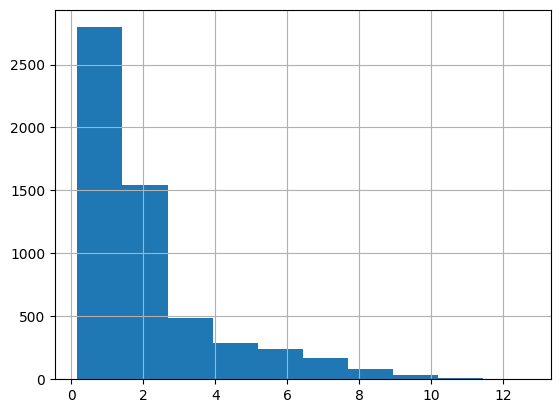

In [198]:
df['Annual_yield'].hist()

In [199]:
df['Annual_yield'].min(), df['Annual_yield'].max()

(np.float64(0.1722256547293427), np.float64(12.695223852226984))

# Data Modeling using LinearRegression

In [200]:
X = df.drop(columns=['Annual_yield'])
y = df['Annual_yield']

In [201]:
scaling = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [202]:
X_train.head()

,Pollution_level,Plot_size,Standard_yield,Elevation,Latitude,Longitude,Slope,Soil_fertility,pH,Rainfall,...,Crop_type_maize,Crop_type_potato,Crop_type_rice,Crop_type_tea,Crop_type_wheat,Location_Rural_Akatsi,Location_Rural_Amanzi,Location_Rural_Hawassa,Location_Rural_Kilimani,Location_Rural_Sokoto
3095,0.361359,4.2,0.667711,793.05676,-10.178935,-0.348819,4.593282,0.67,4.685562,2200.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3831,0.063095,0.6,0.470283,713.19305,-8.295555,-7.776929,17.017866,0.65,5.637248,1364.4,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2886,0.900821,10.3,0.449119,632.19820,-5.407406,-0.195662,2.035682,0.59,5.028043,1187.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4319,0.016228,0.8,0.683807,634.53730,-10.814238,-9.885088,19.315983,0.71,5.348868,2115.1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4316,0.211369,3.0,0.535216,788.00830,-3.406878,-3.979539,11.221638,0.58,5.769474,691.3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [203]:
X_train.shape

(4240, 35)

In [204]:
X_train_scale = scaling.fit_transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [205]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaling, f)

In [206]:
lr=LinearRegression()
lr.fit(X_train_scale,y_train)

LinearRegression()

In [207]:
prediction_lr= lr.predict(X_test_scaled)
prediction_lr

array([1.96557617, 2.60473633, 0.84301758, ..., 0.66674805, 7.60961914,
       1.34204102])

In [208]:
mse = mean_squared_error(y_test, prediction_lr)
r2 = r2_score(y_test, prediction_lr)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2 Score): {r2}')

Mean Squared Error (MSE): 0.1664369278815119
R-squared (R2 Score): 0.9584544184249434


In [209]:
np.sqrt(mse)

np.float64(0.4079668220352139)

In [210]:
mae = mean_absolute_error(y_test, prediction_lr)
mae

np.float64(0.23747760323322975)

In [211]:
residual = y_test - prediction_lr 


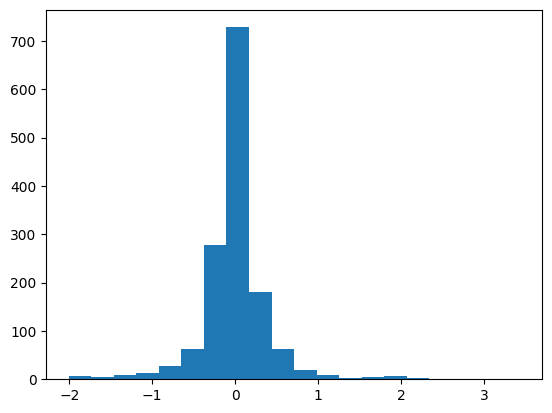

In [212]:
plt.hist(residual, bins=20);

In [213]:
import scipy.stats as stats

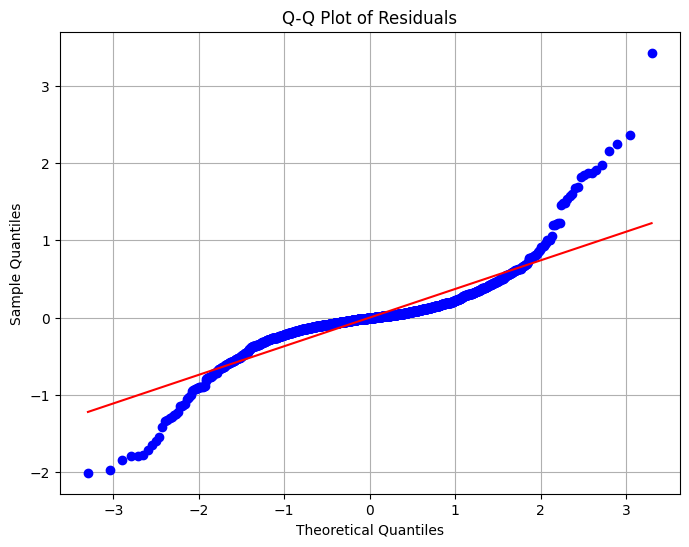

In [214]:
# Create the Q-Q plot for residuals
plt.figure(figsize=(8, 6))
stats.probplot(residual, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

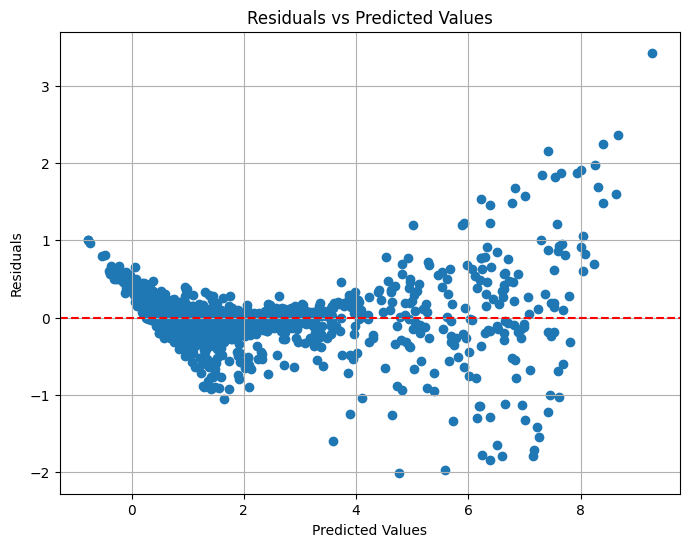

In [215]:
# Create residual plot
plt.figure(figsize=(8, 6))
plt.scatter(prediction_lr, residual)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Using More Sophisticated Model 
1. CatBoostRegressor
2. RandomForestRegressor 

with Hyperparameter tuning

In [216]:
df["Annual_yield"]

0       0.751354
1       1.069865
2       2.208801
3       1.277635
4       0.832614
          ...   
5649    0.609930
5650    3.812289
5651    1.681629
5652    0.659874
5653    0.226532
Name: Annual_yield, Length: 5654, dtype: float64

In [217]:
X = df.drop('Annual_yield', axis=1)  
y = df['Annual_yield']  

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [220]:
rf = RandomForestRegressor(n_estimators=100, random_state=42,)

In [221]:

rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [222]:
prediction_rf_train=rf.predict(X_train_scaled)
prediction_rf_train

array([7.3025605 , 6.10375319, 1.87160374, ..., 1.82371979, 1.59948765,
       0.66454233])

In [223]:
prediction_rf_test=rf.predict(X_test_scaled)
prediction_rf_test

array([1.98624593, 2.5981323 , 0.95604497, ..., 0.61670254, 3.59814023,
       1.54412045])

In [224]:
mse_test= mean_squared_error(y_test, prediction_rf_test)
mse

np.float64(0.1664369278815119)

In [225]:
mse_train= mean_squared_error(y_train, prediction_rf_train)
mse_train

np.float64(0.0007861568462592136)

In [226]:
mae_train = mean_absolute_error(y_train,prediction_rf_train)
mae_train

np.float64(0.011708723817789151)

In [227]:
mae_test = mean_absolute_error(y_test,prediction_rf_test)
mae_test

np.float64(0.03276518505367257)

In [228]:
r2_score_train=r2_score(y_train,prediction_rf_train)
r2_score_train                                        

0.999785242188962

In [229]:
r2_score_test=r2_score(y_test,prediction_rf_test)
r2_score_test

0.9980647880724695

In [230]:
with open('best_model_random_forest.pkl', 'wb') as f:
    pickle.dump(rf, f)  

print("RandomForest model saved successfully!")


RandomForest model saved successfully!


In [231]:
df.to_csv("cleaned_df.csv")

In [232]:
df.head()

,Pollution_level,Plot_size,Annual_yield,Standard_yield,Elevation,Latitude,Longitude,Slope,Soil_fertility,pH,...,Crop_type_maize,Crop_type_potato,Crop_type_rice,Crop_type_tea,Crop_type_wheat,Location_Rural_Akatsi,Location_Rural_Amanzi,Location_Rural_Hawassa,Location_Rural_Kilimani,Location_Rural_Sokoto
0,0.085267,1.3,0.751354,0.577964,786.05580,-7.389911,-7.556202,14.795113,0.62,6.169393,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.399684,2.2,1.069865,0.486302,674.33410,-7.736849,-1.051539,11.374611,0.64,5.676648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.358029,3.4,2.208801,0.649647,826.53390,-9.926616,0.115156,11.339692,0.69,5.331993,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.286687,2.4,1.277635,0.532348,574.94617,-2.420131,-6.592215,7.109855,0.54,5.328150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.043190,1.5,0.832614,0.555076,886.35300,-3.055434,-7.952609,55.007656,0.72,5.721234,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [233]:
df.columns

Index(['Pollution_level', 'Plot_size', 'Annual_yield', 'Standard_yield',
       'Elevation', 'Latitude', 'Longitude', 'Slope', 'Soil_fertility', 'pH',
       'Rainfall', 'Min_temperature_C', 'Max_temperature_C', 'Ave_temps',
       'growing_conditions', 'yield_efficiency', 'Soil_nature',
       'Soil_type_Loamy', 'Soil_type_Peaty', 'Soil_type_Rocky',
       'Soil_type_Sandy', 'Soil_type_Silt', 'Soil_type_Volcanic',
       'Crop_type_banana', 'Crop_type_cassava', 'Crop_type_coffee',
       'Crop_type_maize', 'Crop_type_potato', 'Crop_type_rice',
       'Crop_type_tea', 'Crop_type_wheat', 'Location_Rural_Akatsi',
       'Location_Rural_Amanzi', 'Location_Rural_Hawassa',
       'Location_Rural_Kilimani', 'Location_Rural_Sokoto'],
      dtype='object')